In [1]:
import SchemDraw as schem
import SchemDraw.elements as e
d = schem.Drawing()

# Ref: https://cdelker.bitbucket.io/SchemDraw/SchemDraw.html
# Ref: Teaching ciruits https://pythonforundergradengineers.com/circuit-diagram-problem-with-schemdraw.html

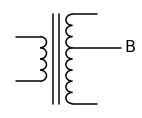

In [2]:
xf = d.add(e.transformer(t1=4, t2=8, rtaps={'B':3}, loop=False))
d.add(e.LINE, xy=xf.s1, l=d.unit/4)
d.add(e.LINE, xy=xf.s2, l=d.unit/4)
d.add(e.LINE, xy=xf.p1, l=d.unit/4, d='left')
d.add(e.LINE, xy=xf.p2, l=d.unit/4, d='left')
d.add(e.LINE, xy=xf.B, l=d.unit/2, d='right', rgtlabel='B')
d.draw()

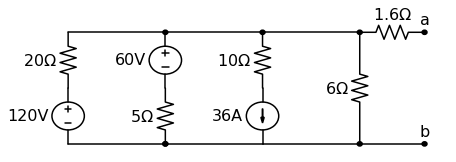

In [3]:
d = schem.Drawing(unit=2)  # unit=2 makes elements with shorter than normal leads
d.push()
R1 = d.add(e.RES, d='down', label='20$\Omega$')
V1 = d.add(e.SOURCE_V, d='down', reverse=True, label='120V')
d.add(e.LINE, d='right', l=3)
d.add(e.DOT)
d.pop()
d.add(e.LINE, d='right', l=3)
d.add(e.DOT)
d.add(e.SOURCE_V, d='down', label='60V', reverse=True)
d.add(e.RES, label='5$\Omega$')
d.add(e.DOT)
d.add(e.LINE, d='right', l=3)
d.add(e.SOURCE_I, d='up', label='36A')
d.add(e.RES, label='10$\Omega$')
d.add(e.DOT)
d.add(e.LINE, d='left', l=3, move_cur=False)
d.add(e.LINE, d='right', l=3)
d.add(e.DOT)
R6 = d.add(e.RES, d='down', toy=V1.start, label='6$\Omega$')
d.add(e.DOT)
d.add(e.LINE, d='left', l=3, move_cur=False)
d.add(e.RES, d='right', xy=R6.start, label='1.6$\Omega$')
d.add(e.DOT, label='a')
d.add(e.LINE, d='right', xy=R6.end)
d.add(e.DOT, label='b')
d.draw()

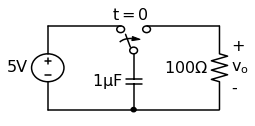

In [4]:
d = schem.Drawing()
V1 = d.add(e.SOURCE_V, label='5V')
d.add(e.LINE, d='right', l=d.unit*.75)
S1 = d.add(e.SWITCH_SPDT2_CLOSE, d='up', anchor='b', rgtlabel='$t=0$')
d.add(e.LINE, d='right', xy=S1.c,  l=d.unit*.75)
d.add(e.RES, d='down', label='$100\Omega$', botlabel=['+','$v_o$','-'])
d.add(e.LINE, to=V1.start)
d.add(e.CAP, xy=S1.a, d='down', toy=V1.start, label='1$\mu$F')
d.add(e.DOT)
d.draw()

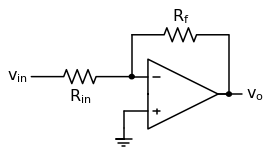

In [5]:
d = schem.Drawing(inches_per_unit=.5)
op = d.add(e.OPAMP)
d.add(e.LINE, d='left', xy=op.in2, l=d.unit/4)
d.add(e.LINE, d='down', l=d.unit/5)
d.add(e.GND)
d.add(e.LINE, d='left', xy=op.in1, l=d.unit/6)
d.add(e.DOT)
d.push()
Rin = d.add(e.RES, d='left', xy=op.in1-[d.unit/5,0], botlabel='$R_{in}$', lftlabel='$v_{in}$')
d.pop()
d.add(e.LINE, d='up', l=d.unit/2)
Rf = d.add(e.RES,  d='right', l=d.unit*1, label='$R_f$')
d.add(e.LINE, d='down', toy=op.out)
d.add(e.DOT)
d.add(e.LINE, d='left', tox=op.out)
d.add(e.LINE, d='right', l=d.unit/4, rgtlabel='$v_{o}$')
d.draw()

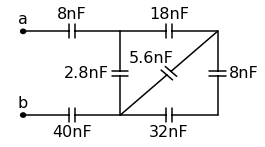

In [6]:
d = schem.Drawing()
A  = d.add(e.DOT, label='a')
C1 = d.add(e.CAP, label='8nF')
C2 = d.add(e.CAP, label='18nF')
C3 = d.add(e.CAP, botlabel='8nF', d='down')
C4 = d.add(e.CAP, botlabel='32nF', d='left')
C5 = d.add(e.CAP, botlabel='40nF')
B  = d.add(e.DOT, label='b')
C6 = d.add(e.CAP, label='2.8nF', endpts=[C1.end,C5.start])
C7 = d.add(e.CAP, endpts=[C2.end,C5.start])
C7.add_label('5.6nF', loc='center', ofst=[-.3,-.1], align=('right','bottom'))
d.draw()

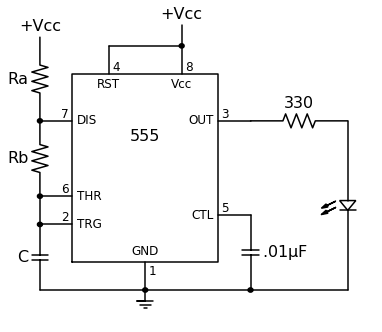

In [7]:
d = schem.Drawing()
left = {'cnt':3,
        'labels':['TRG','THR','DIS'],
        'plabels':['2','6','7'],
        'loc':[.2,.35,.75],
        'lblsize':12,
        }
right = {'cnt':2,
         'labels':['CTL','OUT'],
         'plabels':['5','3'],
        'lblsize':12,
         }
top = {'cnt':2,
       'labels':['RST','Vcc'],
       'plabels':['4','8'],
       'lblsize':12,
       }
bot = {'cnt':1,
       'labels':['GND'],
       'plabels':['1'],
       'lblsize':12,
        }

IC555 = e.blackbox(d.unit*1.5, d.unit*2.25, 
                   linputs=left, rinputs=right, tinputs=top, binputs=bot,
                   leadlen=1, mainlabel='555')
T = d.add(IC555)
BOT = d.add(e.GND, xy=T.GND)  # Note: Anchors named same as pin labels
d.add(e.DOT)
d.add(e.RES, endpts=[T.DIS, T.THR], label='Rb')
d.add(e.RES, d='up', xy=T.DIS, label='Ra', rgtlabel='+Vcc')
d.add(e.LINE, endpts=[T.THR, T.TRG])
d.add(e.CAP, xy=T.TRG, d='down', toy=BOT.start, label='C', l=d.unit/2)
d.add(e.LINE, d='right', tox=BOT.start)
d.add(e.CAP, d='down', xy=T.CTL, toy=BOT.start, botlabel='.01$\mu$F')
d.add(e.DOT)
d.add(e.DOT, xy=T.DIS)
d.add(e.DOT, xy=T.THR)
d.add(e.DOT, xy=T.TRG)
d.add(e.LINE, endpts=[T.RST,T.Vcc])
d.add(e.DOT)
d.add(e.LINE, d='up', l=d.unit/4, rgtlabel='+Vcc')
d.add(e.RES, xy=T.OUT, d='right', label='330')
d.add(e.LED, flip=True, d='down', toy=BOT.start)
d.add(e.LINE, d='left', tox=BOT.start)
d.draw()